In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import random 
import numpy.random as rand
from random import randrange
from scipy.stats import bernoulli, binom
from sklearn.linear_model import LinearRegression

In [3]:
# Set sample size N
N = 5000 

x = [1,0]

random.seed(560)

# Generate random variables 

treat_rand = np.random.choice(x, size = N,replace =True,p=[0.55,0.45])
comply_rand = np.random.choice(x, size = N,replace =True,p=[0.2,0.8])
age_rand = random.choices(list(range(18,61)),k = N)
post_rand = [0]*N
female_rand = np.random.binomial(1,0.51,N)
educ_rand = random.choices(list(range(3,8)),k = N)
a_rand =np.random.binomial (1,0.51,N)

# Create dictionaries for each of the generated variables

treat = {'treat':treat_rand}
comply = {'comply':comply_rand}
age = {'age':age_rand}
female = {'female':female_rand}
educ = {'educ':educ_rand}
a_dummy = {'a_dummy':a_rand}
post = {'post':post_rand}

# combine dictionaires and create dataframe
ds = {**treat,**comply,**educ,**age,**female,**a_dummy,**post}
df = pd.DataFrame(ds)

# Add id variable to the dataset 
df['id'] = range(1, len(df) + 1)

df2 = df
df2['post'] = 1

#append the two dataframes together
df3 = df.append(df2)


In [186]:
import pickle 

dataset_number = 8
seed = 0

name = 'dataset' + str(dataset_number)
with open('/Users/mawuliagamah/gitprojects/causal_inference/dataset1.pkl', 'rb') as f:
    save_dict = pickle.load(f)

In [187]:
y_obser = save_dict['y_obser']
x_obser = save_dict['x_obser']
y_inter = save_dict['y_inter']
x_inter = save_dict['x_inter']

In [189]:
print(y_obser)

[[-0.00430083]
 [ 0.45607497]
 [ 0.16422963]
 ...
 [ 0.3354805 ]
 [-0.30142274]
 [ 1.22610283]]


# 3. Generate simulation study 

## 3.1. RCT simulation

In [3]:
# Observations
random.seed(10)
n = 100

In [4]:
alpha = [1,2]
beta = [1,2]
gamma = [0.5,0.75]

# Anonymous function , ft , which takes arguments t and x and returns the expression on the rhs
ft = lambda t,x : alpha[t] + beta[t]*x + gamma[t]*x*x

In [48]:
# Generate variables (Measured covariates, unmeasured covariates , binary treatment and assignment).

d_rct = pd.DataFrame()


cov1 = [1,0.8,0.7,0.6,0.5]
cov2 = [0.8,1,0.7,0.6,0.5]
cov3 = [0.8,0.6,1,0.7,0.6]

covariance = np.array([[cov1,cov2,cov3]])


# Pre-treatment covariates
mu = 0
sigma = 1

d_rct['X1'] = np.random.normal(mu,sigma , size = (n,))
d_rct['X2'] = np.random.normal(mu,sigma , size = (n,))
d_rct['X3'] = np.random.normal(mu,sigma , size = (n,))
d_rct['X4'] = np.random.normal(mu,sigma , size = (n,))
d_rct['X5'] = np.random.normal(mu,sigma , size = (n,))

# Binary treatment assignment W (drawn from bernoulli dsitribution with p = 0.5 )
p_bernoulli = 0.5
W_uniform = np.random.rand(n) #treatment from uniform distribution
d_rct['W'] = (W_uniform <= p_bernoulli).astype(np.int) # transform to bernoulli

# Error term 

epsilon_rct = np.random.normal(mu,sigma , size = (n,))

# Outcome 

het = 1 + d_rct['X1'] + d_rct['X1']**2 + d_rct['X2'] + d_rct['X2']**2 # Heterogenity of treatment effect
d_rct['Y'] = d_rct['W']*het+ d_rct.sum(axis=1) + epsilon_rct 




In [50]:
corr, _ = pearsonr(d_rct['X1'], d_rct['X5'])
print('Pearsons correlation: %.3f' % corr)

#d_rct['PO'] = np.where(d_rct['Y']-d_rct['Y'])
covariance

Pearsons correlation: -0.057


array([[[1. , 0.8, 0.7, 0.6, 0.5],
        [0.8, 1. , 0.7, 0.6, 0.5],
        [0.8, 0.6, 1. , 0.7, 0.6]]])

In [42]:
d_rct.cov()


,X1,X2,X3,X4,X5,T,Y
X1,0.816005,-0.015556,0.151320,0.124563,-0.079168,0.006537,0.114248
X2,-0.015556,0.938017,0.036922,-0.256591,-0.017167,-0.009489,0.785183
X3,0.151320,0.036922,0.842670,-0.035502,-0.080125,0.009872,0.688260
X4,0.124563,-0.256591,-0.035502,1.130989,-0.077536,0.039992,0.705675
X5,-0.079168,-0.017167,-0.080125,-0.077536,1.122035,0.025396,0.852120
T,0.006537,-0.009489,0.009872,0.039992,0.025396,0.250909,1.120366
Y,0.114248,0.785183,0.688260,0.705675,0.852120,1.120366,14.449947


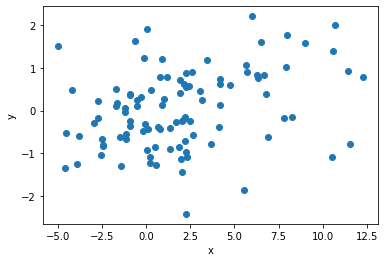

In [12]:
plt.scatter(d_rct['Y'],d_rct['X2'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:

y = d_rct['Y'].values.reshape(-1, 1)
x = d_rct['X5'].values.reshape(-1, 1)

In [15]:
regressor = LinearRegression()
regressor.fit(x,y)
y_pred = regressor.predict(x)
df_preds = pd.DataFrame({'Actual': y.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual  Predicted
0    2.214664   4.527921
1   -1.441297   0.598434
2    8.269342   3.216671
3    2.282052   2.796535
4   -0.043611  -1.043980
..        ...        ...
95   0.575603   1.317514
96  -1.618608   0.785541
97  -4.172743   0.739179
98   2.611232   2.248225
99  10.701466   4.691295

[100 rows x 2 columns]
